# DataSynthesizer Usage (correlated attribute mode)

> This is a quick demo to use DataSynthesizer in correlated attribute mode.

### Step 1 import packages

In [ ]:
!python3 -m pip install pandas matplotlib seaborn DataSynthesizer

In [1]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2 user-defined parameteres

In [2]:
# input dataset
input_data = 'data.csv'
# location of two output files
mode = 'correlated_attribute_mode'
description_file = 'description.json'
synthetic_data = 'NCD_synthetic_data.csv'

In [3]:
seed = 99

# An attribute is categorical if its domain size is less than this threshold.
# Here modify the threshold to adapt to the domain size of "education" (which is 14 in input dataset).
threshold_value = 6

# specify categorical attributes
categorical_attributes = {'DM_key': True,	
                          'IFG_key': True,	
                          'DM_ICD10': True,
                          'DM_drugs': True,
                          'HTN_key': True,
                          'cvd_key': True,
                          'HTN_ICD10': True,
                          'HTN_drugs': True,
                          'CKD_key': True,
                          'CKD_ICD10': True,
                          'CKD_drugs': True,
                          'DLP_key': True,
                          'DLP_ICD10': True,
                          'DLP_drugs': True,
                          'DM_label': True,
                          'HTN_label': True,
                          'CKD_label': True,
                          'DLP_label': True}

# specify which attributes are candidate keys of input dataset.
candidate_keys = {'Id': True}

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = 0

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 2

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = 2000 # Here 32561 is the same as input dataset, but it can be set to another number.

### Step 3 DataDescriber

1. Instantiate a DataDescriber.
2. Compute the statistics of the dataset.
3. Save dataset description to a file on local machine.

In [4]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon, 
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys,
                                                        seed=seed)
describer.save_dataset_description_to_file(description_file)

================ Constructing Bayesian Network (BN) ================
Adding ROOT sbp1
Adding attribute dbp1
Adding attribute AGE
Adding attribute eGFR
Adding attribute LDL-c
Adding attribute Glucose
Adding attribute CKD_drugs
Adding attribute DM_drugs
Adding attribute DLP_drugs
Adding attribute HTN_drugs
Adding attribute HTN_ICD10
Adding attribute DM_ICD10
Adding attribute DLP_ICD10
Adding attribute CKD_ICD10
Adding attribute HbA1c
Adding attribute HTN_label
Adding attribute HTN_key
Adding attribute DM_label
Adding attribute DM_key
Adding attribute DLP_key
Adding attribute DLP_label
Adding attribute CKD_key
Adding attribute CKD_label
Adding attribute cvd_key
Adding attribute IFG_key
========================== BN constructed ==========================


/home/bom/.local/lib/python3.10/site-packages/DataSynthesizer/lib/PrivBayes.py:275: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for parents_instance, stats_sub in stats.groupby(parents):


In [5]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    dbp1      has parents ['sbp1'].
    AGE       has parents ['dbp1', 'sbp1'].
    eGFR      has parents ['AGE', 'dbp1'].
    LDL-c     has parents ['eGFR', 'sbp1'].
    Glucose   has parents ['LDL-c', 'sbp1'].
    CKD_drugs has parents ['AGE', 'dbp1'].
    DM_drugs  has parents ['CKD_drugs', 'Glucose'].
    DLP_drugs has parents ['DM_drugs', 'AGE'].
    HTN_drugs has parents ['DLP_drugs', 'eGFR'].
    HTN_ICD10 has parents ['AGE', 'sbp1'].
    DM_ICD10  has parents ['HTN_ICD10', 'DM_drugs'].
    DLP_ICD10 has parents ['DM_ICD10', 'DLP_drugs'].
    CKD_ICD10 has parents ['DM_ICD10', 'eGFR'].
    HbA1c     has parents ['Glucose', 'sbp1'].
    HTN_label has parents ['AGE', 'sbp1'].
    HTN_key   has parents ['HTN_label', 'dbp1'].
    DM_label  has parents ['AGE', 'sbp1'].
    DM_key    has parents ['DM_label', 'LDL-c'].
    DLP_key   has parents ['LDL-c', 'sbp1'].
    DLP_label has parents ['DLP_key', 'dbp1'].
    CKD_key   has parents ['CKD_ICD10', 'AGE'].

### Step 4 generate synthetic dataset

1. Instantiate a DataGenerator.
2. Generate a synthetic dataset.
3. Save it to local machine.

In [6]:
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, 
                                                        description_file,
                                                        seed=seed)
generator.save_synthetic_data(synthetic_data)

### Step 5 compare the statistics of input and sythetic data

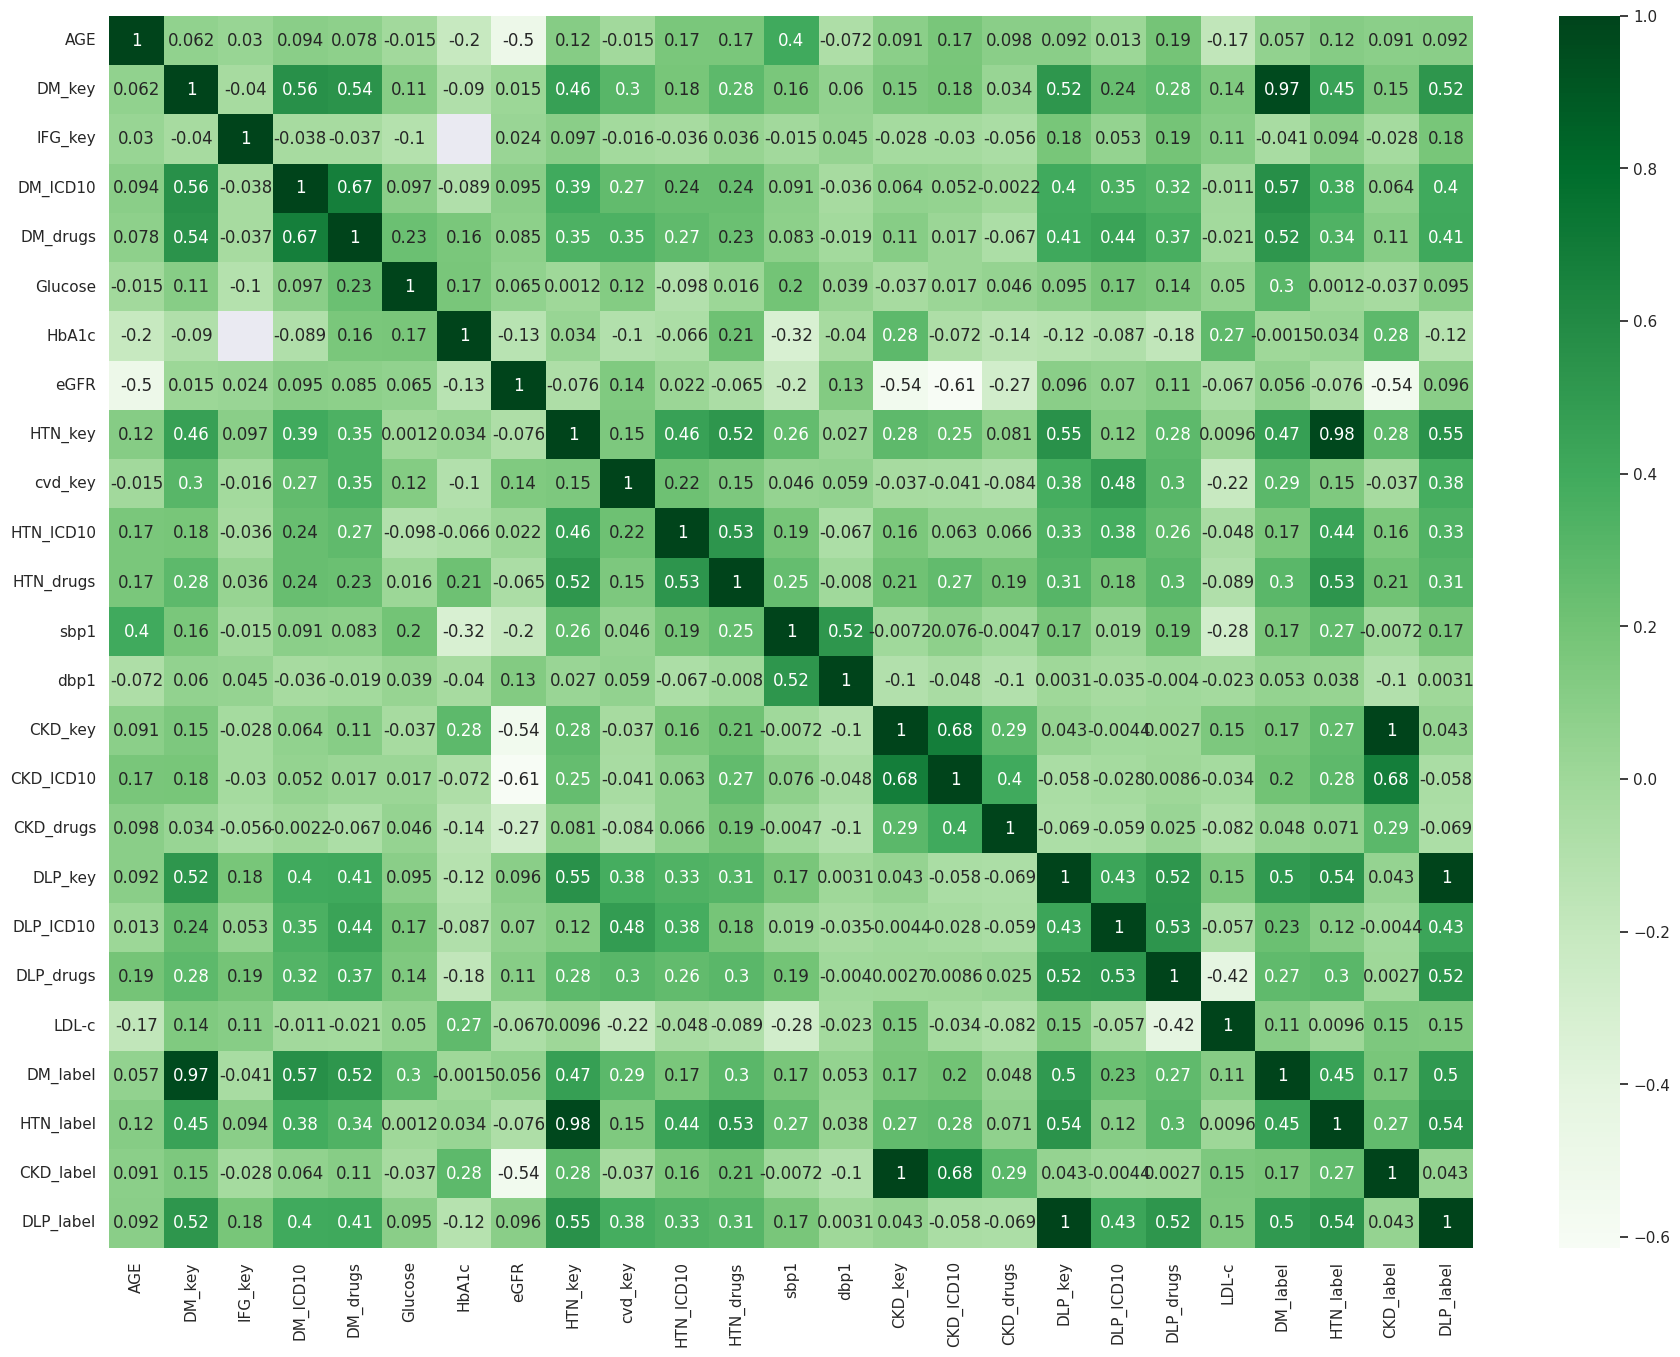

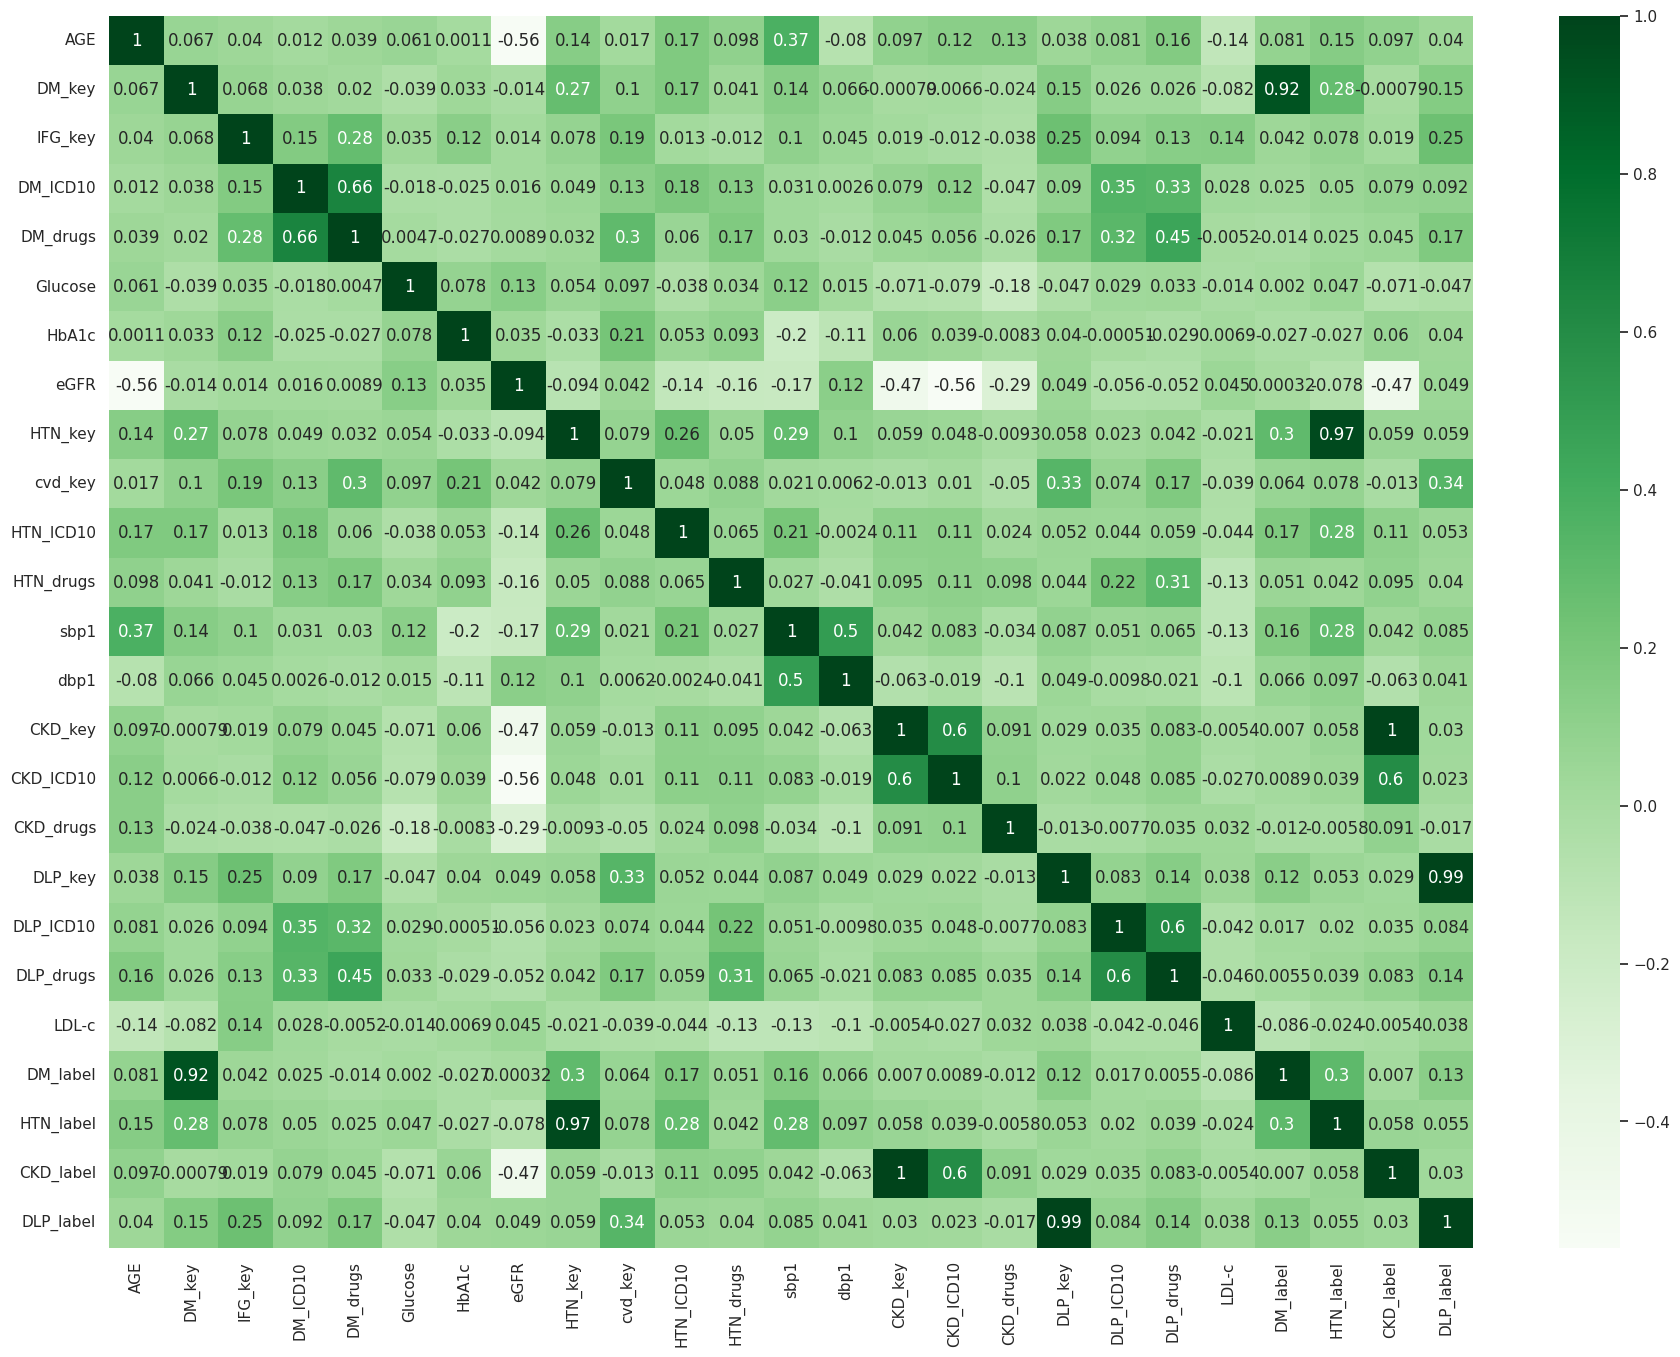

In [7]:
# Real data
data = pd.read_csv("data.csv", index_col="Id")

plt.figure(figsize=(22, 16))
sns.heatmap(data.corr(), cmap="Greens", annot=True)
plt.show()

# Synthetic data
data = pd.read_csv("NCD_synthetic_data.csv", index_col="Id")

plt.figure(figsize=(22, 16))
sns.heatmap(data.corr(), cmap="Greens", annot=True)
plt.show()